# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 pretrained model을 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.
    - 보통 Feature Extractor block을 재사용한다.

## Pytorch에서 제공하는 Pretrained Model 
- 분야별 라이브러리에서 제공
    - torchvision: https://pytorch.org/vision/stable/models.html
- torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    - https://pytorch.org/hub/
- 이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.    
    - 딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.  
    - 다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
    - [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 
    
>  **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## VGGNet Pretrained 모델을 이용해 이미지 분류

- Pytorch가 제공하는 VGG 모델은 ImageNet dataset으로 학습시킨 weight를 제공한다.
    - 120만장의 transet, 1000개의 class로 구성된 데이터셋.
    - Output으로 1000개의 카테고리에 대한 확률을 출력한다. 

In [3]:
# ImageNet 1000개의 class 목록
#wget이라는 라이브러리를 설치하고 import 한다. 
#!pip install wget 
import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url)
#url은 1000개의 클래스를 텍스트로 만든 것이다.
#이 코드를 실행하면, 가상환경에 대상 파일이 다운된 것을 볼 수 있다.

100% [..............................................................................] 30564 / 30564

In [4]:
with open (imagenet_filepath,"rt") as fr:
    index_to_class = eval(fr.read())
    #eval이라는 함수: 파이썬코드를 문자열로 넣으면, 알아서 해석해서 실행해준다.
    #eval을 통해 index_to_class에 dict 형태로 넣었다.
print(type(index_to_class))

<class 'dict'>


In [5]:
#이런 식으로, 이름을 출력할 수 있다.
index_to_class[110]

'flatworm, platyhelminth'

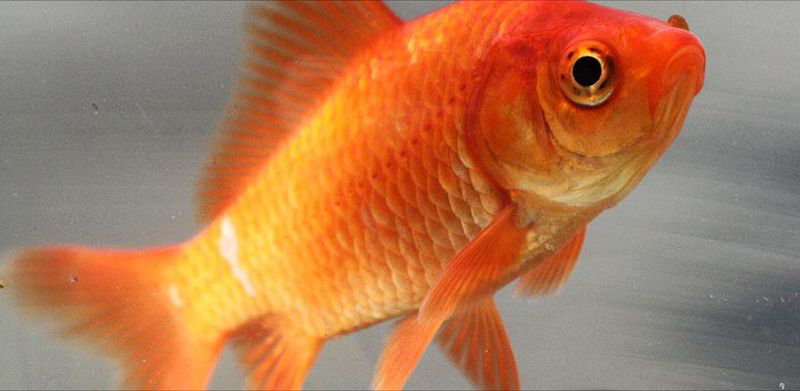

In [6]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
# img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
# img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
res = requests.get(img_url) #url로 요청해서 응답을 받는다. 그 페이지에서 값을 받는 거지.
test_img = Image.open(BytesIO(res.content)) #응답받은 것이 binary 파일일 경우에는 이렇게 한다.
#content 메소드를 통해 컨텐츠만 받는다.
test_img

In [7]:
##import

import torch
from torchvision import models,transforms
from torchinfo import summary


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [8]:
##torchvision에서 제공하는 Pretrained 모델을 다운로드
#VGG19 모델

#weights:학습된 파라미터들을 같이 다운로드 받는다는 의미이다. Image Net 데이터셋으로 학습한 파라미터를 받는다.
#IMAGENET1K_V1 :Image net 버전1로 학습된 파라미터
#IMAGENET1K_V2 :Image net 버전2로 학습된 파라미터
#모델에 따라서, v2버전을 없을 수 있다.
#models.VGG19_Weights.DEFAULT - 둘 중에 기본 데이터셋으로 설정된 것을 받는다.
load_model_vgg = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)





In [9]:
#alex 모델을 통해서 한번 해보자.
#이 모델은 10여년전에 혜성처럼 나타난 모델인데, 
#도태되지 않고 최신 흐름에 따라 계속해서 변화하고 있는 모델이다.
load_model_alex = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

In [10]:
#model들에 대한 정보를 summary를 통해 보자.

summary(load_model_alex,(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [11]:
model = load_model_alex.to(device) #device에 다 같이 넣어야 계산이 가능하다.
i = torch.randn(1,3,224,224).to(device) #가짜 데이터
p = model(i) #모델에 가짜 데이터를 넣으면, 쭈욱 통과해서 1,1000짜리 결과가 나올 것이다.
print(p.shape)

torch.Size([1, 1000])


In [12]:
p[0].argmax(dim=-1) #argmax을 통해 가장 큰 값이 있는 위치를 출력.

tensor(474)

In [13]:
label=p[0].argmax(dim=-1).item()
print(index_to_class[label])

cardigan


In [14]:
#자,이제를 확률을 출력해 보자.
torch.nn.Softmax(dim=-1)(p[0]).max(dim=-1).values

tensor(0.2062, grad_fn=<MaxBackward0>)

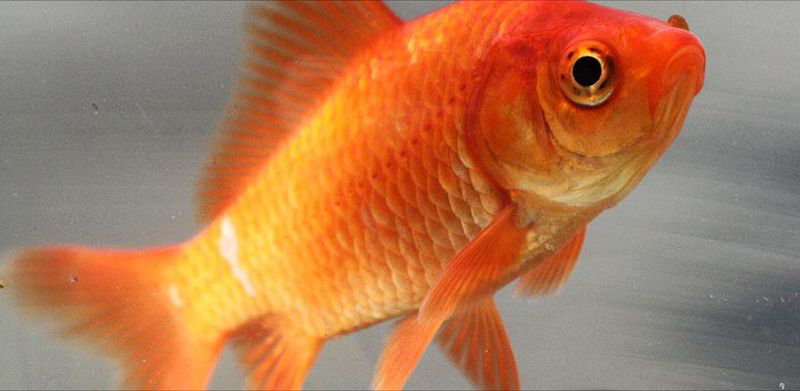

In [15]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
#img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
#img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
#img_url = 'https://i.namu.wiki/i/uk5VsDTA_sXLvqe0Rwj8E678mIj4SkhbUqRyS27TEvVsFVliMwtuO6BpLe9N65IYG5c2XgWndG13sQiReZoz1A.webp'

res = requests.get(img_url)  # url로 요청-> 응답 받기.
test_img = Image.open(BytesIO(res.content)) 
# 응답받은 것이 binary 파일일 경우. BytesIO(binary) => bytes타입 입출력이 가능한 객체.
test_img

In [16]:
#전처리

test_transform = transforms.Compose([
    transforms.Resize((224,224),antialias=True),
    transforms.ToTensor() 
    #PIL.Image -> torch.Tensor, 0~1 scaling, channel first 처리
    
])

In [23]:

input_data = test_transform(test_img) 
#test_img 가 resize가 되고, totensor로 바뀐다.
print(type(input_data),input_data.shape,input_data.min(),input_data.max())



<class 'torch.Tensor'> torch.Size([3, 224, 224]) tensor(0.) tensor(1.)


In [24]:
#batch 축을 추가.

input_data = input_data.unsqueeze(dim=0)
input_data.shape

torch.Size([1, 3, 224, 224])

In [25]:
# 모델을 device로 이동
# 이 과정을 하지 않으면 정확도가 획기적으로 떨어진다(!)
model = load_model_vgg.to(device)

In [26]:
pred1 = model(input_data.to(device))

In [27]:
pred1

tensor([[ 5.8271e+00,  1.8752e+01,  1.8621e+00,  4.9716e+00,  3.6095e+00,
          7.7679e+00,  5.1255e+00,  1.5246e+00,  1.7792e+00, -1.8695e+00,
         -2.1143e-01, -2.5576e+00, -7.8635e-01, -2.7510e+00, -1.0208e+00,
         -1.5884e+00, -3.2962e+00, -1.8618e+00, -4.3855e+00, -1.9362e+00,
         -5.0453e+00,  3.8052e-01, -1.0893e+00, -5.7809e-01, -4.2285e+00,
         -5.1536e-01,  5.9543e+00,  6.2009e+00, -2.5543e-01,  1.7811e+01,
          4.0316e-01,  1.4963e+00,  2.7072e+00,  1.8766e+00, -7.8279e-01,
         -8.4168e-01,  3.0370e+00, -4.8692e-01,  9.2386e+00,  2.0180e-02,
          4.2142e+00,  3.4308e+00,  2.9402e+00,  3.0964e+00,  3.0268e+00,
         -1.2140e+00,  4.3397e+00,  7.1206e+00, -1.5791e+00, -3.6860e+00,
          6.3975e-01,  6.4788e+00,  2.7426e+00, -1.7279e+00, -1.3533e+00,
         -3.4507e+00, -3.5166e+00, -3.2868e+00,  1.1983e-01, -4.9003e-01,
         -8.3770e-01, -1.3330e+00, -8.7205e-01,  2.8794e+00,  1.3919e+00,
         -3.5800e-01, -1.5178e-01, -2.

In [28]:
#Softmax에 pred1을 넣어 확률값으로 바꾼다.
#추론 결과를 확률로 변환한다.
pred_prob1 = torch.nn.Softmax(dim=-1)(pred1)
#추론 label, 확률값을 조회한다.
label1 = pred_prob1.max(dim=-1).indices
prob1 = pred_prob1.max(dim=-1).values
#추론 label을 이용해서 label name을 조회한다.
labelname1 = index_to_class[label1.item()]


In [29]:
print(label1.item(),labelname1)
print("확률:",prob1.item())

1 goldfish, Carassius auratus
확률: 0.7186648845672607


# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- 모델/레이어의 parameter trainable 여부 속성 변경
    - model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 trainable로 한다.**

**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

In [30]:
%%writefile module/utils.py


#위의 줄은 파일을 따로 만들어 덮어씌우는 것이다.

import matplotlib.pyplot as plt

def plot_fit_result(train_loss_list,train_acc_list,val_loss_list,val_acc_list):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title("Loss")
    plt.plot(train_loss_iist,label="Train")
    plt.plot(val_loss_iist,label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("Accuracy")
    plt.plot(train_acc_list,label="Train")
    plt.plot(val_acc_list,label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Writing module/utils.py


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os
from zipfile import ZipFile
!pip install gdown -U
import gdown

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [32]:
# download
url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
path = r'data/cats_and_dogs_small.zip'
gdown.download(url, path, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=ccd6927b-9056-45ed-8f1f-bdeeb60dddfe
To: C:\Users\User\부트캠프 강의-파이썬\Deeplearning_pytorch\data\cats_and_dogs_small.zip
100%|█████████████████████████████████████████████████████████████████████████████| 90.8M/90.8M [00:02<00:00, 30.6MB/s]


'data/cats_and_dogs_small.zip'

In [34]:
#압축 풀기 - zip

image_path = os.path.join("datasets","cats_and_dogs_small") #압축 풀 경로
with ZipFile(path) as zfile: #Zipfile(압축파일경로)
    zfile.extractall(image_path) #extractall(압축 풀 디렉토리 경로) #경로 생략-현재 dir에 푼다.
    
#    위와 같이 압축을 풀면, 실제로 압축이 풀려서 폴더가 생긴다.
    
    

## Dataset,Dataloader를 생성

In [39]:
#transform 정의 
#Trainset: Image augmentation + Resize + ToTensor



train_transform = transforms.Compose([
    transforms.Resize((224,224)), #Image Net 학습 모델: input size:224*224
    # 상수 -> 1-상수 ~1+상수 범위에서 변환.
    transforms.ColorJitter(brightness=0.3,contrast=0.3,saturation=0.5,hue=0.15),
    transforms.RandomHorizontalFlip(), #p=0.5(default)
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=90), #-90~+90 범위에서 회전.
    transforms.ToTensor(),
    transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
    #채널별:(평균),(표준편차)  #(각 픽셀값-평균)/표준편차
    #위의 주석과 같은 정보를 토대로 정규화를 한다.
    
    
])

In [40]:
### validation/test set ==>Image augmentation은 정의하지 않는다.
#'성능'을 예측하는 것이기 때문에, 이미지를 굳이 변형시킬 필요가 없기 때문이다.
##### Resize, ToTensor, Normalize

test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
])





In [52]:
#dataset

train_set = datasets.ImageFolder(os.path.join(image_path,"train"),transform=train_transform)
#path.join을 통해 경로를 붙여준다.

valid_set = datasets.ImageFolder(os.path.join(image_path,"validation"),transform=test_transform)

test_set = datasets.ImageFolder(os.path.join(image_path,"test"),transform=test_transform)


#train만 train_transform을 쓰고 나머지는 다 test_transform이다.



In [42]:
#결과 출력

train_set.classes

['cats', 'dogs']

In [44]:
##하이퍼파라미터 정의

BATCH_SIZE = 256
N_EPOCH = 1
LR=0.001


In [53]:
###DataLoader
#num_workers는 data를 load와 함께 병렬 처리하겠다는 것이다.

train_loader = DataLoader(train_set,batch_size=BATCH_SIZE,drop_last=True,
                          shuffle=True, num_workers=os.cpu_count())
#data를 load할 때 병렬처리하겠다. => 한번에 몇개씩 동시에 loading할지.
#os.cpu_count() ->cpu 프로세서 개수
#근데, 프로세서 개수를 풀로 돌릴 경우, 코드를 실행하면서 유튜브를 보는 것은 안된다.


valid_loader = DataLoader(valid_set,batch_size=BATCH_SIZE,num_workers=os.cpu_count())
valid_loader = DataLoader(test_set,batch_size=BATCH_SIZE,num_workers=os.cpu_count())




In [54]:
#한 배치만 조회

batch_one=next(iter(train_loader)) #(X,y)
batch_one[0].shape, batch_one[1].shape

(torch.Size([256, 3, 224, 224]), torch.Size([256]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


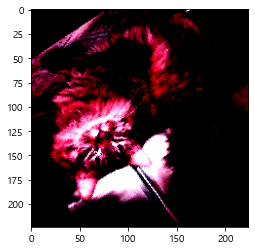

In [58]:
#데이터를 자세히 봐보자.

import matplotlib.pyplot as plt


#batch_one의 인덱스를 바꿔보면서 이미지를 출력해보자.
plt.imshow(batch_one[0][100].permute(1,2,0))

In [59]:
### layer들의 파라미터들을 조회한다. ->model.parameters()
# 모델의 모든 layer들의 모든 파라미터를 순서대로 반환하는 generator
## layer의 파라미터 ->layer객체.weight, layer 객체.bias



##파라미터의 train 가능 여부 ->
# Tensor객체.requires_grad: True - trainable, False: Non-Trainable(Frozen)



In [60]:
#pretrained VGG19 모델을 가져온다.

model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)


In [65]:
###파라미터 확인 - trainable상태를 확인한다.

for param in model.parameters():
    print(param.shape,param.requires_grad) #채널:3개, 사이즈:3*3, 개수:64
    #bias:64개
    #위 순서대로 우리에게 주는 것이다.
#    break

torch.Size([64, 3, 3, 3]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([128, 64, 3, 3]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([256, 128, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([512, 256, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([4096, 25088]) True
torch.Size([4096]) True
torch.Size([4096, 4096]) True
torch.Size(

In [66]:
#parameter를 frozen =>학습이 안되도록 한다.
#방법:requires_grad를 모두 false로 바꾼다.

for param in model.parameters():#model.parameters 함수에 관한 것을 잘 파악하자.
    param.requires_grad = False 

In [67]:
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [69]:
#summary하기

summary(model,(1,3,224,224))
#유의깊게 봐야할 것은 Trainable params가 0개라는 것이다.


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

In [71]:
print(model) #instance 변수들을 출력

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
def __init__(self):
    self.features = nn.Sequential()
    
    
    

In [78]:
#classifer를 정의해서 model에 추가한다.
#VGG19의 attribute 변수 classifier 추론기가 정의설정되어 있는 상태.
## =>새로운 추론기(개/고양이 분류)를 정의한 뒤 classifier attribute 변수에 할당한다.

model.classifier = nn.Sequential(
    nn.Linear(512*7*7,4096),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(4096,2) #개/고양이 두개 class를 분류한다. 그래서 out을 2로 한다.
    
    
    
    
    
)


In [79]:
#summary를 통해 정보를 파악한다.
#summary를 통해 보면, 학습이 되는 부분이 있고 안되는 부분이 있다는 사실을 잘 파악하자.
summary(model,(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 2]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

In [80]:
##학습시키기

model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=LR)
result = fit(train_loader,valid_loader,model,loss_fn,optimizer,N_EPOCH,
            save_best_model=False,device=device,mode="multi")


Epoch[1/1] - Train loss: 0.61593 Train Accucracy: 0.55250 || Validation Loss: 0.16216 Validation Accuracy: 0.93700
1190.489263534546 초
